# Data Description

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Task is to predict the rings of each abalone.

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [126]:
df= pd.read_csv('abalone.csv')

In [127]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [128]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [129]:
df.shape

(4177, 9)

We have 4177 rows and 9 columns in our dataset

In [130]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Observations:
    1. There is no missing values.
    2. There are chances of outliers in Height,shell weight and Rings
    3. we need to check the skewness as there is slight difference between mean and median

In [131]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [132]:
df.min()

Sex                    F
Length             0.075
Diameter           0.055
Height                 0
Whole weight       0.002
Shucked weight     0.001
Viscera weight    0.0005
Shell weight      0.0015
Rings                  1
dtype: object

Here, minimum height is 0, which is not possible. so we will have to treat it as missing value and remove it.

In [133]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

here, datatype of sex is object, so we have to convert it into int as machine learning does not take object or string datatype into consideration

In [134]:
df['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [135]:
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

# Converting String to numeric datatype

In [136]:
from sklearn.preprocessing import LabelEncoder

In [137]:
le=LabelEncoder()

In [138]:
df['Sex'] = le.fit_transform(df['Sex'])

In [139]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Univariate Analysis

<AxesSubplot:xlabel='Rings', ylabel='count'>

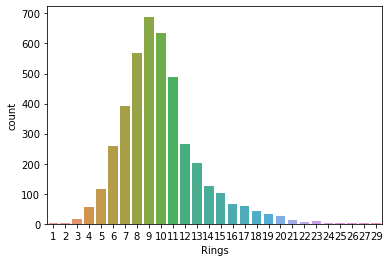

In [140]:
sns.countplot(df['Rings'])

Here, class imbalance can be seen.

<AxesSubplot:xlabel='Length', ylabel='Density'>

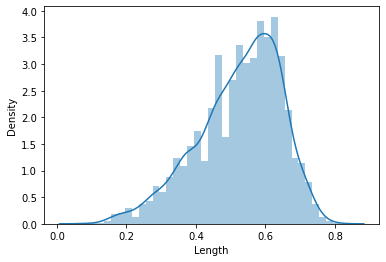

In [141]:
sns.distplot(df['Length'])

Data is skewed slightly 

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

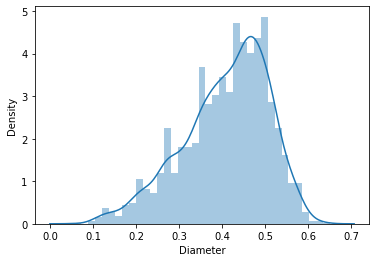

In [142]:
sns.distplot(df['Diameter'])

Data is skewed here also

<AxesSubplot:xlabel='Height', ylabel='Density'>

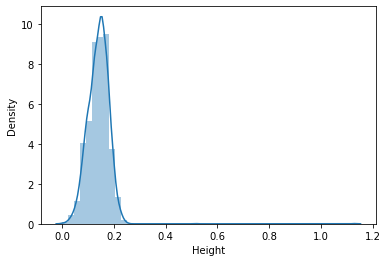

In [143]:
sns.distplot(df['Height'])

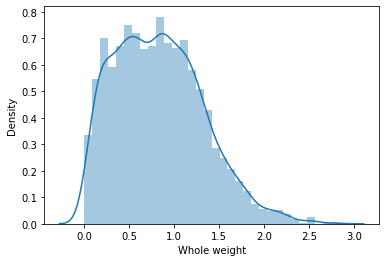

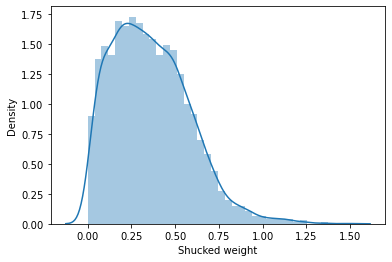

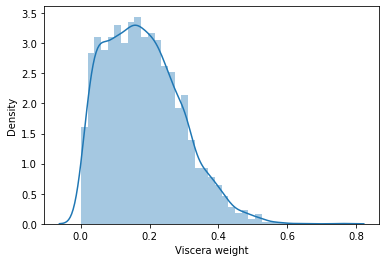

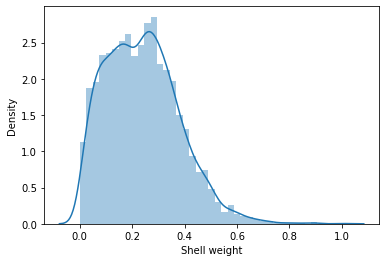

In [144]:
columns=['Whole weight','Shucked weight', 'Viscera weight','Shell weight']

for i in df[columns]:
    plt.figure()
    sns.distplot(df[i])

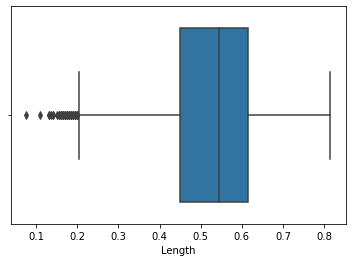

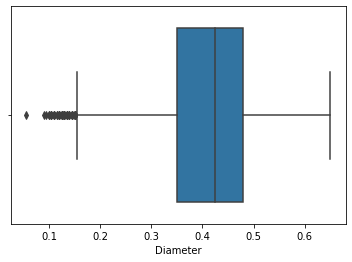

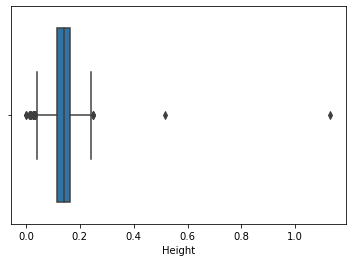

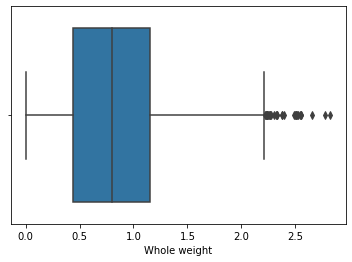

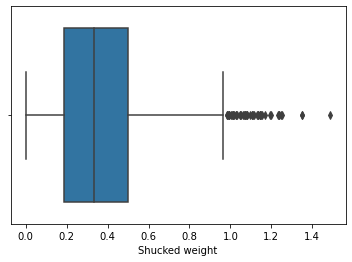

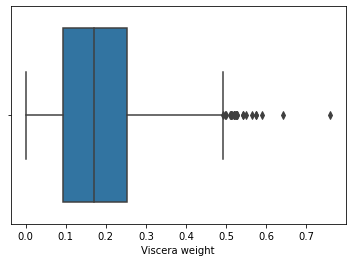

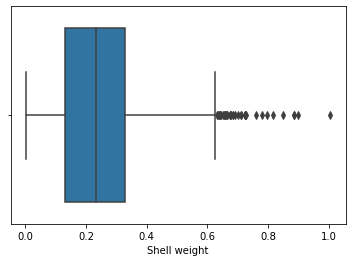

In [145]:
columns = ['Length','Diameter','Height','Whole weight','Shucked weight', 'Viscera weight','Shell weight']

for i in df[columns]:
    plt.figure()
    sns.boxplot(df[i])

Here, we can see the outliers in all the columns,so we need to treat outliers

# Multivariate Analysis

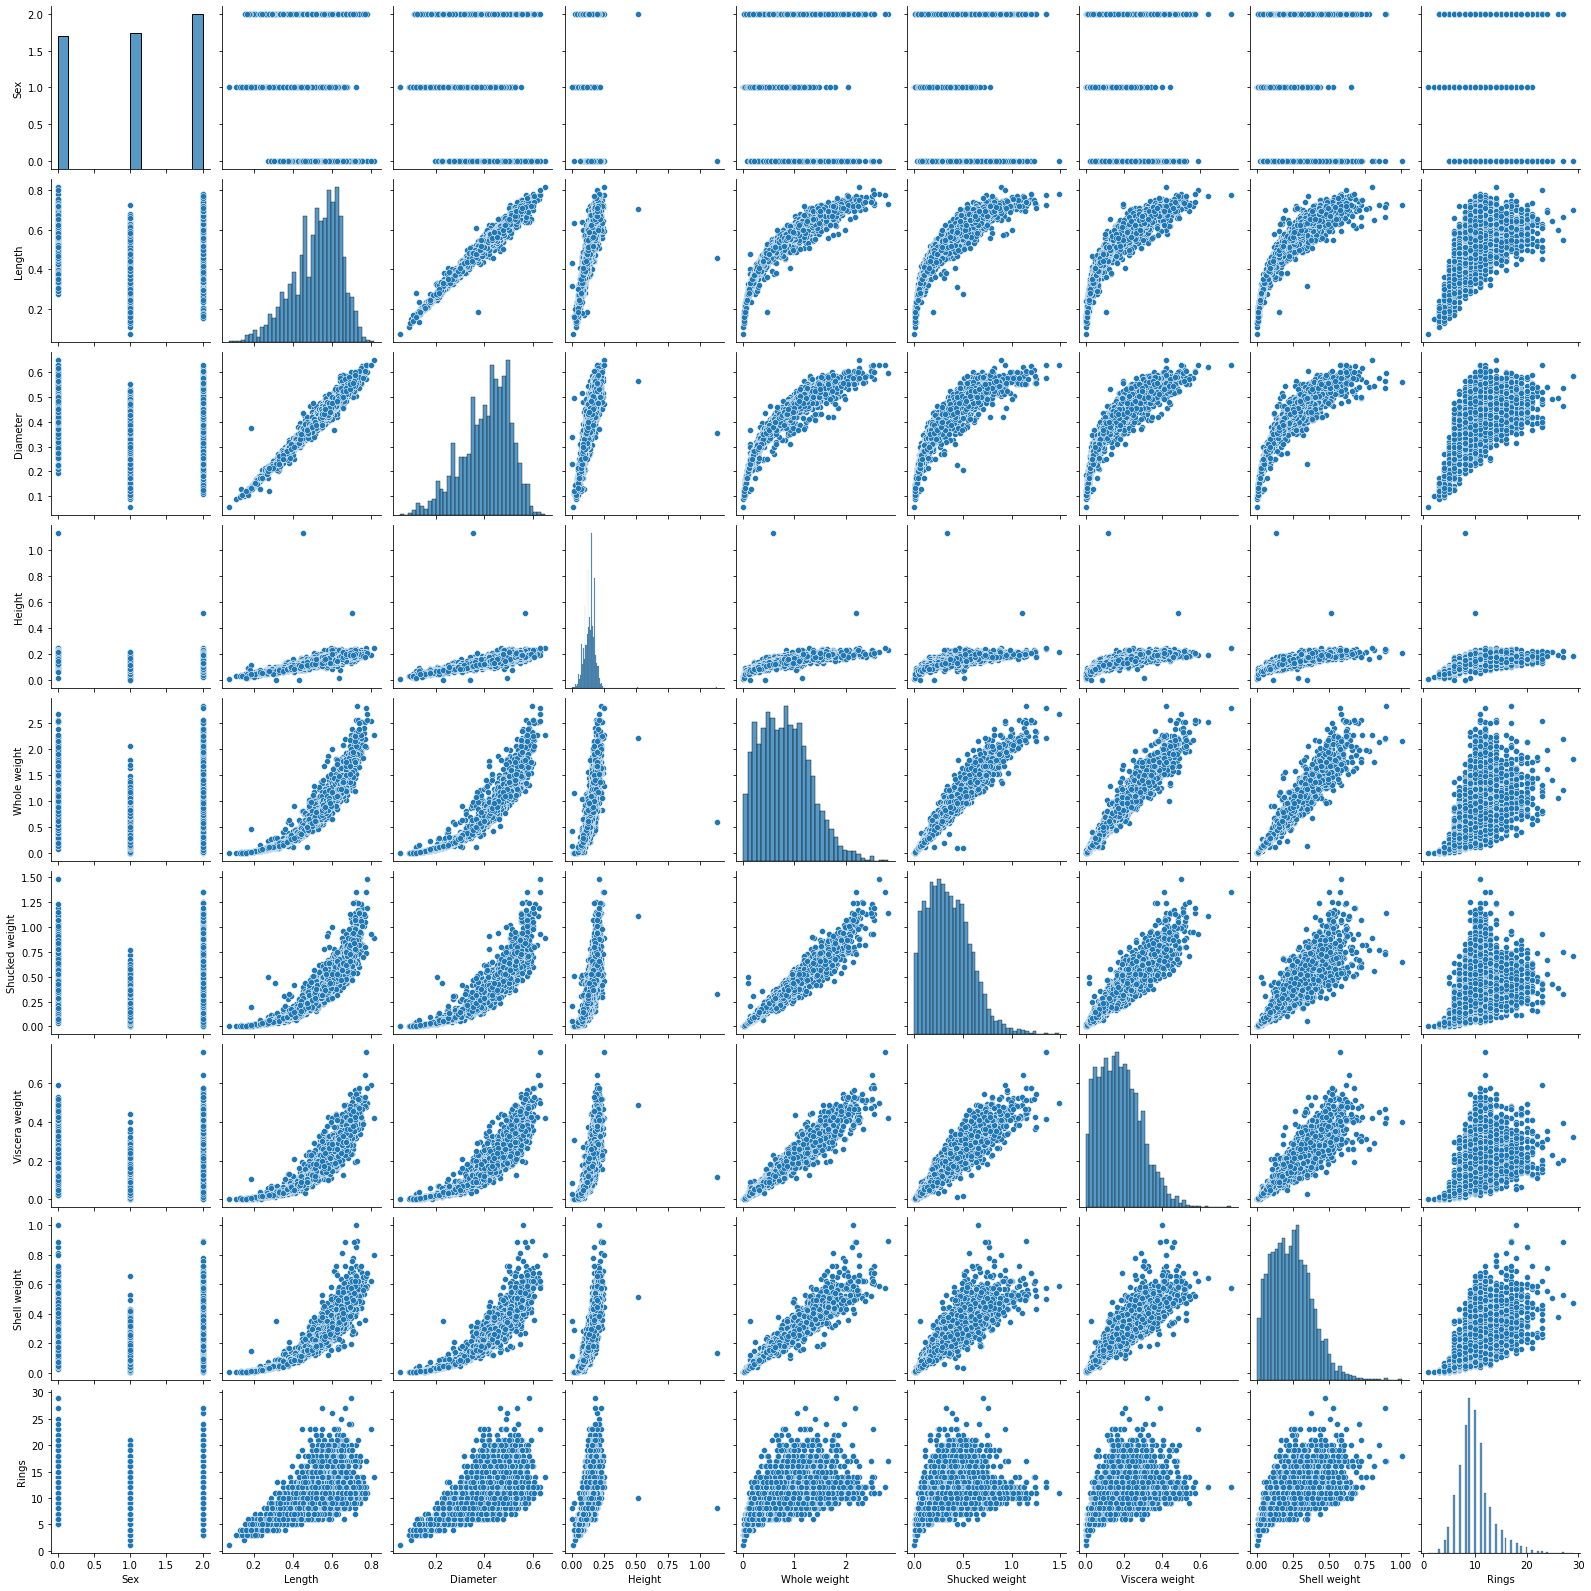

In [146]:
sns.pairplot(df)

# Handling Missing values

In [147]:
df['Height']=df['Height'].replace(0,df['Height'].mean())

In [148]:
df.min()

Sex               0.0000
Length            0.0750
Diameter          0.0550
Height            0.0100
Whole weight      0.0020
Shucked weight    0.0010
Viscera weight    0.0005
Shell weight      0.0015
Rings             1.0000
dtype: float64

In [149]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# Removing Outliers

In [150]:
from scipy.stats import zscore

In [151]:
z=np.abs(zscore(df))

In [152]:
newdf=df[(z<3).all(axis=1)]

In [153]:
df.shape

(4177, 9)

In [154]:
newdf.shape

(4029, 9)

In [155]:
#so here, 148 rows are getting deleted, so (148/4177)*100 = 3.5 which is less than 10 percent of the data, so its acceptable

In [156]:
df=newdf

In [157]:
df.shape

(4029, 9)

In [158]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# Checking the skewness

In [159]:
df.skew()

Sex              -0.094816
Length           -0.621961
Diameter         -0.597677
Height           -0.244372
Whole weight      0.334719
Shucked weight    0.458771
Viscera weight    0.437599
Shell weight      0.349333
Rings             0.725901
dtype: float64

Skewness of Variable Length and Diameter needs to be treated

# Checking the correlation

In [160]:
dfcor=df.corr()

In [161]:
dfcor

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.043578,-0.046469,-0.046284,-0.034728,-0.016419,-0.045240,-0.043817,-0.033234
Length,-0.043578,1.000000,0.986022,0.894986,0.934452,0.909298,0.908016,0.913661,0.567357
Diameter,-0.046469,0.986022,1.000000,0.901352,0.934105,0.904355,0.904246,0.920878,0.585246
Height,-0.046284,0.894986,0.901352,1.000000,0.891447,0.842729,0.868949,0.899526,0.612363
Whole weight,-0.034728,0.934452,0.934105,0.891447,1.000000,0.971041,0.966635,0.960521,0.548561
Shucked weight,-0.016419,0.909298,0.904355,0.842729,0.971041,1.000000,0.930196,0.895583,0.440738
Viscera weight,-0.045240,0.908016,0.904246,0.868949,0.966635,0.930196,1.000000,0.918767,0.523194
Shell weight,-0.043817,0.913661,0.920878,0.899526,0.960521,0.895583,0.918767,1.000000,0.622413
Rings,-0.033234,0.567357,0.585246,0.612363,0.548561,0.440738,0.523194,0.622413,1.000000


<AxesSubplot:>

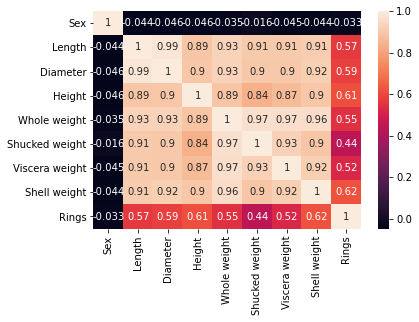

In [162]:
sns.heatmap(dfcor,annot=True)

Observation:
All the variables are correlated with each other except sex.


In [163]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# Splitting the dataset

In [164]:
x=df.drop('Rings',axis=1)

In [165]:
y=df['Rings']

In [166]:
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


# Removing the skewness of the data

In [167]:
x.skew()

Sex              -0.094816
Length           -0.621961
Diameter         -0.597677
Height           -0.244372
Whole weight      0.334719
Shucked weight    0.458771
Viscera weight    0.437599
Shell weight      0.349333
dtype: float64

In [168]:
from sklearn.preprocessing import power_transform

In [169]:
df_new = power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)
df_new.skew()

Sex              -0.174466
Length           -0.082999
Diameter         -0.080963
Height           -0.015907
Whole weight     -0.016725
Shucked weight    0.021906
Viscera weight    0.036024
Shell weight      0.016666
dtype: float64

In [170]:
x=df_new

# Applying Standard Scaler

In [171]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
ds_x=sc.fit_transform(x)

In [172]:
ds_x = pd.DataFrame(ds_x,columns=x.columns)

In [173]:
x=ds_x

# Building a model

In [174]:
from sklearn.model_selection import train_test_split

# Finding the best Random state

In [175]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [176]:
lr=LinearRegression()

In [177]:
maxr2=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    lm.score(x_train,y_train)
    lm.score(x_test,y_test)
    ypred=lm.predict(x_test)
    acc=r2_score(y_test,ypred)
    if acc>maxr2:
        maxr2=acc
        maxRS=i
print('Best accuracy is',maxr2, 'for random state',maxRS)    

Best accuracy is 0.5621853358970075 for random state 62


In [178]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=62)
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [179]:
lm.score(x_train,y_train)

0.4980765480242786

In [180]:
lm.score(x_test,y_test)

0.5621853358970075

In [181]:
ypred=lm.predict(x_test)

In [182]:
r2_score(y_test,ypred)

0.5621853358970075

# Regularization

In [184]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV

In [187]:
lasscv=LassoCV(alphas=None,cv=10,max_iter=1000, normalize=1000)

In [188]:
lasscv.fit(x_train,y_train)

LassoCV(cv=10, normalize=1000)

In [190]:
alpha=lasscv.alpha_
alpha

3.217667490309187e-05

In [192]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)
lasso_reg.score(x_test,y_test)

0.5621842146637079

In [193]:
alphas=np.random.uniform(low=0,high=10,size=(50,))
ridgecv=RidgeCV(alphas=alphas,cv=10,normalize= True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([7.34519593, 9.99351432, 3.19141134, 8.70275694, 6.03984541,
       5.58241207, 3.93936823, 5.46420003, 7.58153151, 4.91353716,
       0.40116979, 2.58346666, 8.76068268, 0.18294075, 3.80809285,
       6.65413232, 5.74659942, 6.44536768, 9.70294924, 4.93431268,
       3.66211131, 1.31191435, 3.06410203, 3.62216285, 2.99307796,
       3.79354211, 4.26412613, 0.43531278, 0.42801073, 0.12680278,
       0.05266288, 1.78393392, 8.90509424, 9.11622841, 0.21981469,
       1.69937201, 4.12253988, 8.89830492, 9.68403688, 1.75079035,
       0.34760456, 3.17706148, 3.38137313, 9.82348543, 8.0634754 ,
       6.971865  , 1.68759396, 3.56793229, 1.97468544, 7.61038683]),
        cv=10, normalize=True)

In [194]:
ridgecv.alpha_

0.05266287713655782

In [195]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.05266287713655782)

In [196]:
ridge_model.score(x_test,y_test)

0.5621725228770321

Model accuracy is 56 percent